<h1 align='center'>Projeto de Controlador Polinomial<h1>

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

# Configurações de plot:
plt.style.use([
    'grid',
    'retro'
])
#plt.rcParams['lines.linewidth'] = 3
#plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (12, 5)

<h3 align='center'>Função de Transferência do Sistema:<h3>

In [2]:
s = ct.tf('s')

G = (((0.25*s)+2.5)/((s**3)+(0.5*(s**2))-(0.25*s)-1.25))

G

TransferFunction(array([0.25, 2.5 ]), array([ 1.  ,  0.5 , -0.25, -1.25]))

<h3 align='center'>Polos desejados:<h3>

In [3]:
zeta = -(np.log(0.2)/np.sqrt((np.pi**2)+(np.log(0.2)**2)))

wn = (4/(zeta*10))

pd = ((s**2)+(2*zeta*wn*s)+(wn**2))

ct.zeros(pd)

array([-0.4+0.78079251j, -0.4-0.78079251j])

<h3 align='center'>Denominador da malha fechada:<h3>

In [4]:
#Grau do denominador da malha fechada = 2*3 - 1 = 5:
D = (pd*(s+4)*(s+5)*(s+6))

D

TransferFunction(array([  1.        ,  15.8       ,  86.76963694, 190.74455407,
       152.95313341,  92.35643255]), array([1]))

<h3 align='center'>Solução Matricial:<h3>

In [5]:
E = np.array([
    [-1.25, 0, 0, 2.5, 0, 0],
    [-0.25, -1.25, 0, 0.25, 2.5, 0],
    [0.5, -0.25, -1.25, 0, 0.25, 2.5],
    [1, 0.5, -0.25, 0, 0, 0.25],
    [0, 1, 0.5, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
])

D = np.array([92.36, 153, 190.7, 86.77, 15.8, 1]).T

M = np.linalg.inv(E)@D

M

array([64.739278  , 15.3       ,  1.        , 69.313639  , 68.3925639 ,
       58.52288801])

<h3 align='center'>Função de Transferência do Controlador:<h3>

In [6]:
C = (((58.52288801*(s**2))+(68.3925639*s)+69.313639)/((1*(s**2))+(15.3*s)+64.739278))

C

TransferFunction(array([58.52288801, 68.3925639 , 69.313639  ]), array([ 1.      , 15.3     , 64.739278]))

<h3 align='center'>Malha Fechada Resultante:<h3>

In [7]:
T = ct.feedback(C*G)

T

TransferFunction(array([ 14.630722 , 163.405361 , 188.3098195, 173.2840975]), array([  1.  ,  15.8 ,  86.77, 190.7 , 153.  ,  92.36]))

<h3 align='center'>Zeros da Malha Fechada:<h3>

In [8]:
zmf = ct.zeros(T)

zmf

array([-10.        +0.j        ,  -0.58432321+0.91812392j,
        -0.58432321-0.91812392j])

<h3 align='center'>Pré-Compensador para cancelamento dos zeros dominantes:<h3>

In [9]:
#Pré-compensador:
Pc = (1/((s-zmf[1])*(s-zmf[2])))

Pc

TransferFunction(array([1]), array([1.        +0.j, 1.16864643+0.j, 1.18438514+0.j]))

<h3 align='center'>MF + Pré-Compensador:<h3>

In [10]:
Pc*T

TransferFunction(array([ 14.630722 +0.j, 163.405361 +0.j, 188.3098195+0.j, 173.2840975+0.j]), array([  1.        +0.j,  16.96864643+0.j, 106.41899867+0.j,
       310.81673561+0.j, 478.62997213+0.j, 497.02514964+0.j,
       289.14711054+0.j, 109.38981167+0.j]))

<h3 align='center'>Ajuste para ganho unitário:<h3>

In [11]:
Pc = Pc*(109.4/173.3)

Pc

TransferFunction(array([0.63127525+0.j]), array([1.        +0.j, 1.16864643+0.j, 1.18438514+0.j]))

<h3 align='center'>Função de Transferência Total:<h3>

In [12]:
Gt = (Pc*T)

Gt

TransferFunction(array([  9.23601262+0.j, 103.15375934+0.j, 118.87532749+0.j,
       109.38996115+0.j]), array([  1.        +0.j,  16.96864643+0.j, 106.41899867+0.j,
       310.81673561+0.j, 478.62997213+0.j, 497.02514964+0.j,
       289.14711054+0.j, 109.38981167+0.j]))

In [13]:
ct.zeros(Gt)

array([-10.        +1.11022302e-16j,  -0.58432321+9.18123916e-01j,
        -0.58432321-9.18123916e-01j])

In [14]:
ct.poles(Gt)

c:\Users\Erick\AppData\Local\Programs\Python\Python310\lib\site-packages\control\xferfcn.py:1083: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\Erick\AppData\Local\Programs\Python\Python310\lib\site-packages\control\xferfcn.py:1113: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


array([-5.96777116+0.j        , -5.06391524+0.j        ,
       -3.96761029+0.j        , -0.58432321+0.91812392j,
       -0.58432321-0.91812392j, -0.40035166+0.78103279j,
       -0.40035166-0.78103279j])

<h3 align='center'>Resposta ao Degrau:<h3>

c:\Users\Erick\AppData\Local\Programs\Python\Python310\lib\site-packages\control\statesp.py:114: ComplexWarning: Casting complex values to real discards the imaginary part
  arr = np.array(data, dtype=float)


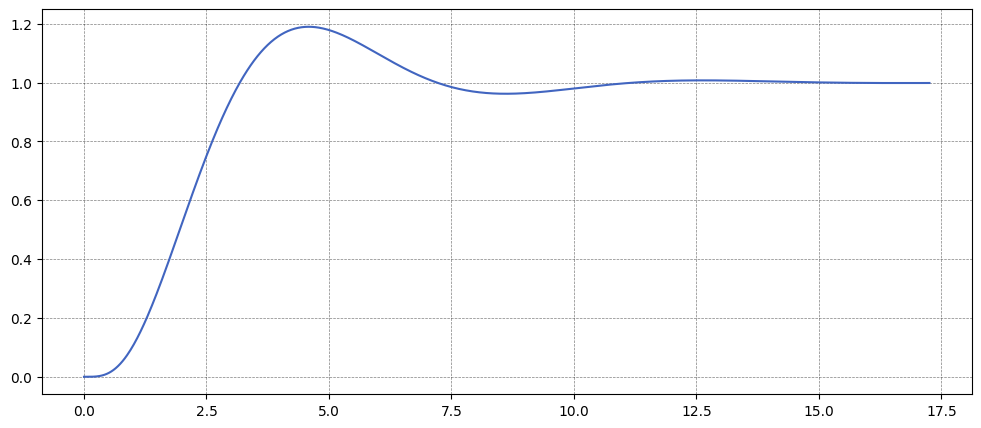

In [15]:
sol = ct.step_response(Gt)

plt.figure(1)
plt.plot(sol[0], sol[1])
plt.show()